# 2. Inference Statistics

The scientific method

![title](Scientific_Method_3.jpg)

## The Central Limit Theorem

As we have seen previously, many of the distributions we have seen (discrete and continuous) when we increase our sample size, sufficiently, the mean of all samples drawn from the population will be approximately equal to the mean of the population.

These samples will follow an approximate normal distribution, with the variances approximatelly equal to the variance of the population divided by the sample's size.

In many instances a sufficiently large sample is generalized to a size larger than 30.

#### Lets Review an example that will allows to introduce our next topic Point Estimates

In [1]:
##Lets generate some data that represent the whole population age distribution
##install.packages("e1071")
library(e1071)
set.seed(12)
population_ages <- c(rexp(1000000,0.015)+18,   # Generate a population
                     rpois(500000,20)+18,
                     rpois(500000,32.5)+18,
                     rpois(500000,45)+18)

population_ages <- ifelse(population_ages<100, population_ages, population_ages%%100+18)

true_mean <- mean(population_ages)
true_mean

[1] 51.21884

In [2]:
set.seed(10)
sample_ages <- sample(population_ages, size=1000)  # Take a sample of 1000 ages

sample_mean <- mean(sample_ages)            # Make a point estimate of the mean

sample_mean

sample_mean-true_mean   # Check difference between estimate and population parameter


[1] 52.16361

[1] 0.9447717

In [3]:
set.seed(12)
population_races <- c(rep("white",1000000),    # Generate some dummy demographic data
                      rep("hispanic",500000),
                      rep("black",500000),
                      rep("asian",250000),
                      rep("other",250000))

demographic_sample <- sample(population_races, size=1000)       # Take a sample

for (race in unique(demographic_sample)){            # Loop over each race*
  print(paste(race," proportion estimate:"))       
  print(sum(demographic_sample==race)/1000)        # Print the estimated proportion
}

[1] "white  proportion estimate:"
[1] 0.4
[1] "asian  proportion estimate:"
[1] 0.096
[1] "other  proportion estimate:"
[1] 0.093
[1] "black  proportion estimate:"
[1] 0.207
[1] "hispanic  proportion estimate:"
[1] 0.204


[1] 0.6556028

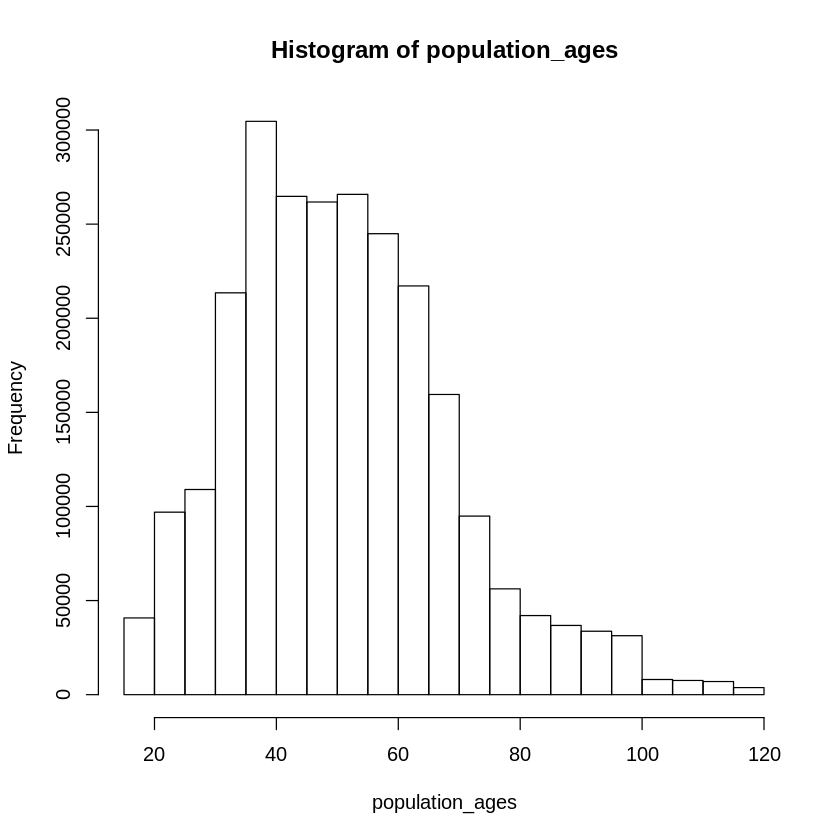

In [4]:
hist(population_ages, breaks=20)  # Create histogram of population

skewness(population_ages)         # Check the skewness


[1] 0.6709607

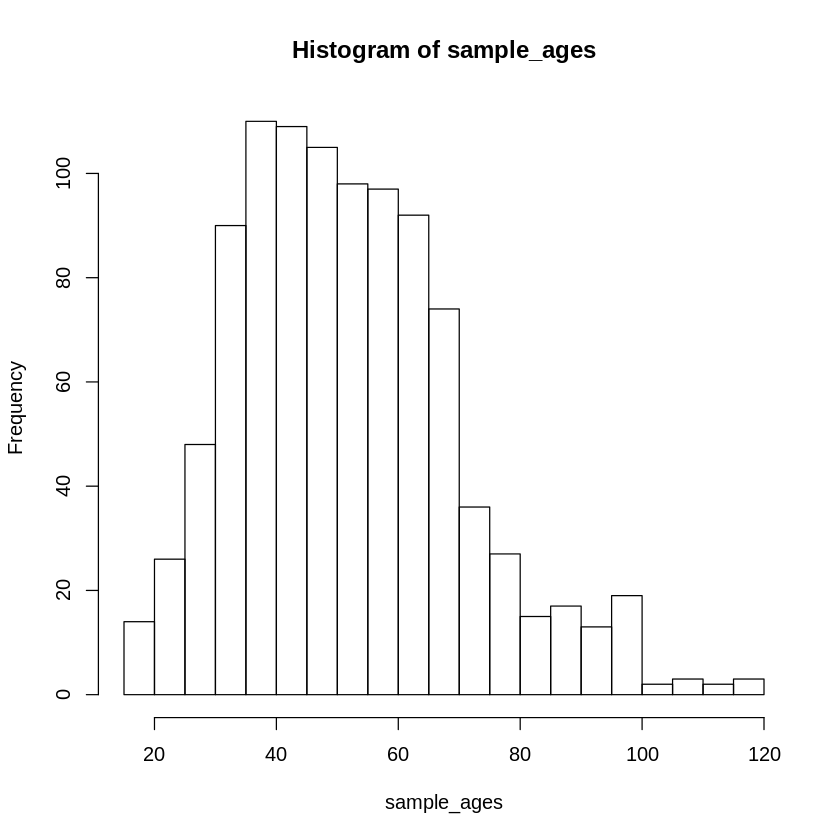

In [5]:
hist(sample_ages, breaks=20)   # Create histogram of the sample

skewness(sample_ages)          # Check the skewness (point estimate of skewness)


[1] -0.01307386

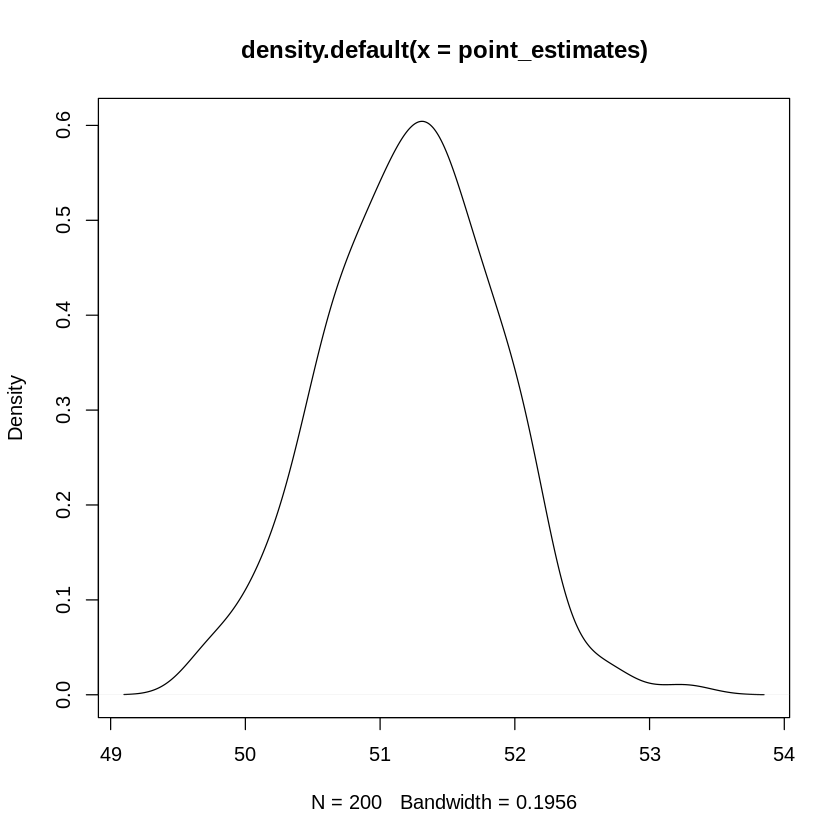

In [6]:
#boot strap

set.seed(12)
point_estimates <- c()    # Create an empty vector to hold results

num_samples <- 200        # Initialize number of samples to take

for (x in 1:num_samples){         # Draw 200 samples and make 200 point estimates
  sample <- sample(population_ages, size=1000)
  point_estimates <- c(point_estimates, mean(sample))
}

plot(density(point_estimates))  # Plot the sampling distribution
skewness(point_estimates)


In [7]:
mean(point_estimates)

mean(point_estimates)-true_mean    # Difference between true mean and sample means


[1] 51.22498

[1] 0.006137824

## Confidence intervals

A point estimate can give you a rough idea of a population parameter like the mean, but estimates are prone to error and taking multiple samples to get improved estimates may not be feasible. 

A confidence interval is a range of values above and below a point estimate that captures the true population parameter at some predetermined confidence level. For example, if you want to have a 95% chance of capturing the true population parameter with a point estimate and a corresponding confidence interval, you'd set your confidence level to 95%. Higher confidence levels result in a wider confidence intervals.


Calculate a confidence interval by taking a point estimate and then adding and subtracting a margin of error to create a range. Margin of error is based on your desired confidence level, the spread of the data and the size of your sample. The way you calculate the margin of error depends on whether you know the standard deviation of the population or not.


If you know the standard deviation of the population, the margin of error is equal to:

$$ z * \frac {\sigma}{\sqrt{\bar{n}}} $$

In [12]:
#install.packages("mosaic")
library(mosaic)

trellis.par.set(theme=col.mosaic())
options(digits=3)

###
mu = 500
sigma = 100
x = rnorm(500, mean=mu, sd=sigma)



also installing the dependencies ‘ggformula’, ‘mosaicData’, ‘mosaicCore’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: dplyr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: lattice
Loading required package: ggformula
Loading required package: ggplot2

New to ggformula?  Try the tutorials: 
	learnr::run_tutorial("introduction", package = "ggformula")
	learnr::run_tutorial("refining", package = "ggformula")
Loading required package: mosaicData
Loading required package: Matrix

The 'mosaic' package masks several functions from core packages in order to add 
additional features.  The original behavior of these functions should not be affected by this.

Note: If you use the Matrix package, be sure to load it BEFORE loading mosaic.

Attaching package: ‘mosaic’


In [13]:
##produces a complete set of stats from a vector
favstats(x)

,min,Q1,median,Q3,max,mean,sd,n,missing
,214,426,492,562,824,497,104,500,0


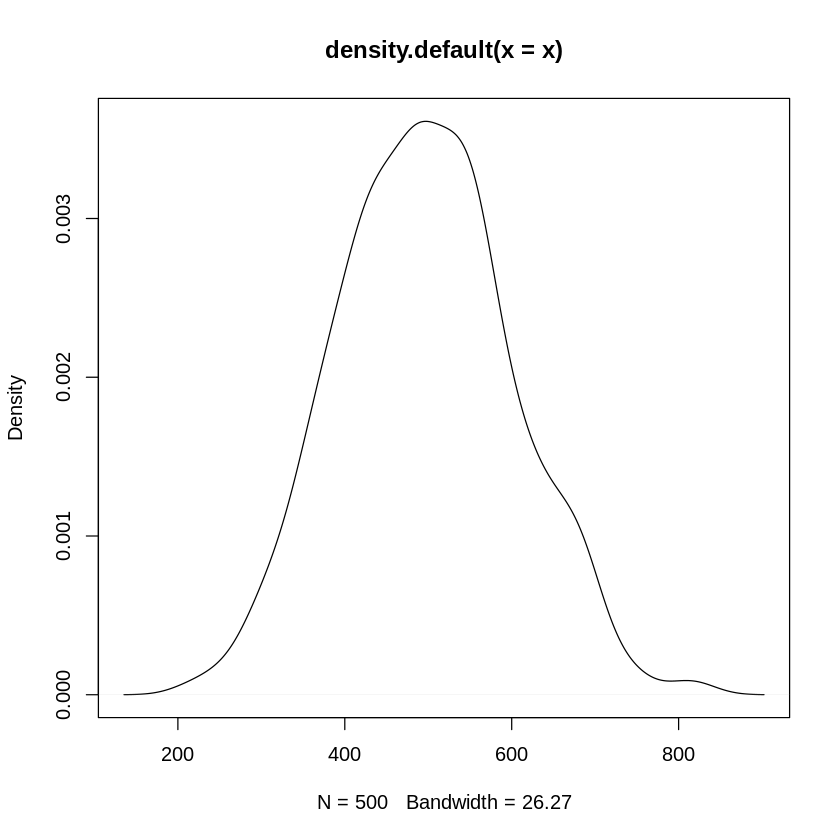

In [14]:
#introducing a kernel density estimator
plot(density(x))

In [15]:
##Estimating confidence intervals

meanconfint = function (x, sigma, level = 0.95, ...) {
  se = sigma / sqrt(length(x))
  mu = mean(x)
  z = qnorm(1 - (1 - level)/2)
  out = c(mu, mu - z * se, mu + z * se)
  names(out) = c("mean", "lower", "upper")
  return(out)
}

meanconfint(x, sigma = sigma)

z_critical <- qnorm(0.975)
z_critical

mean lower upper 
  497   488   506

[1] 1.96

In [16]:
###do function from the mosaic package, repear something many times
randomx = do(50) * rnorm(500, mean=mu, sd=sigma)

ci = data.frame(t(apply(randomx, 1, meanconfint, sigma=sigma)))


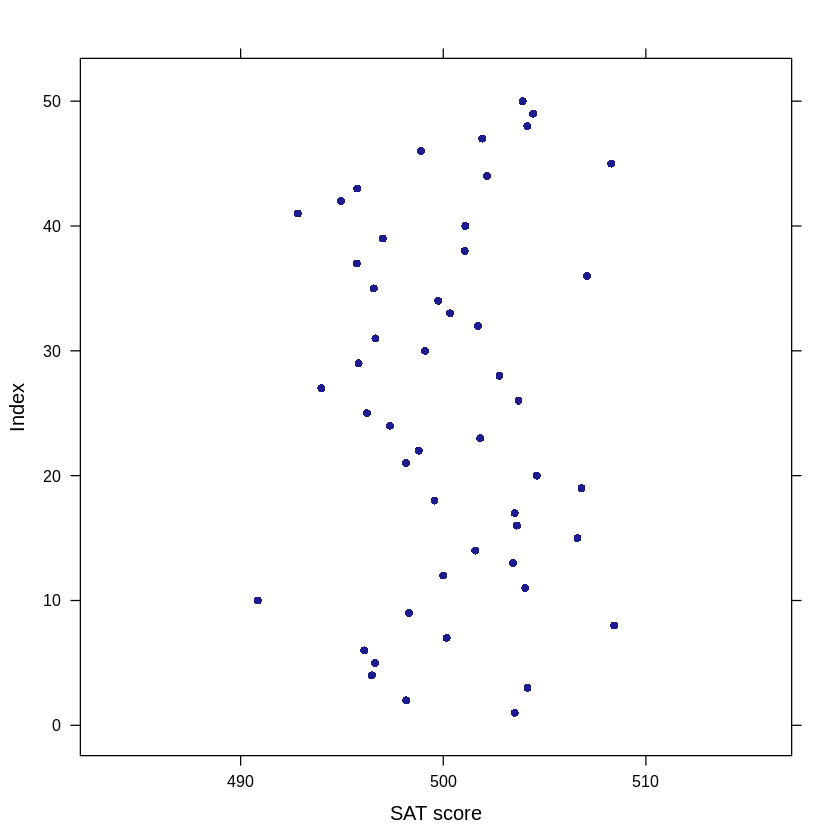

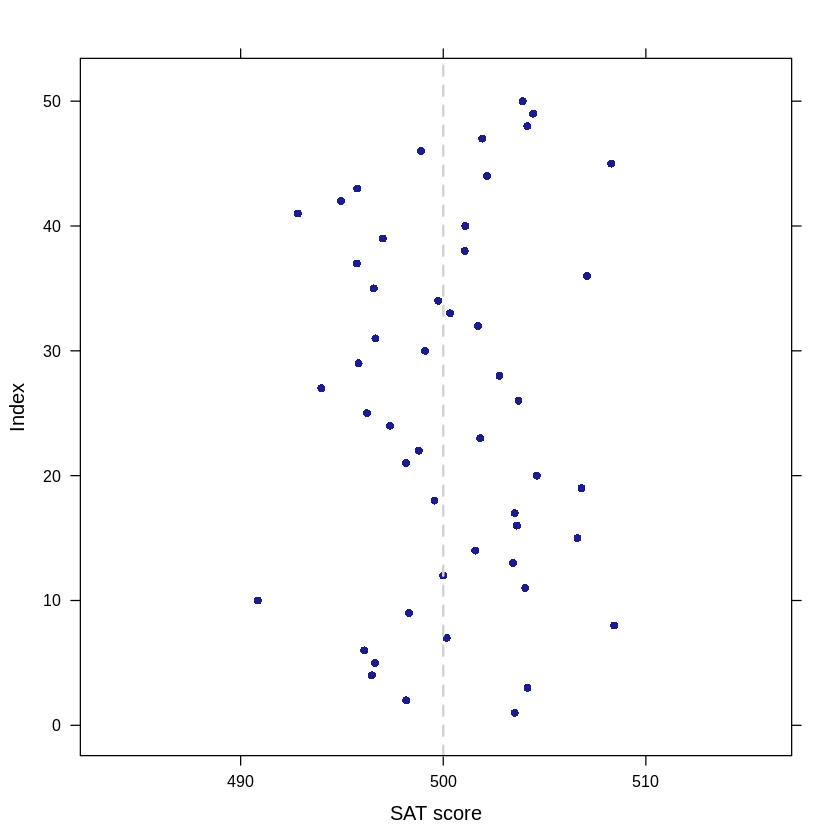

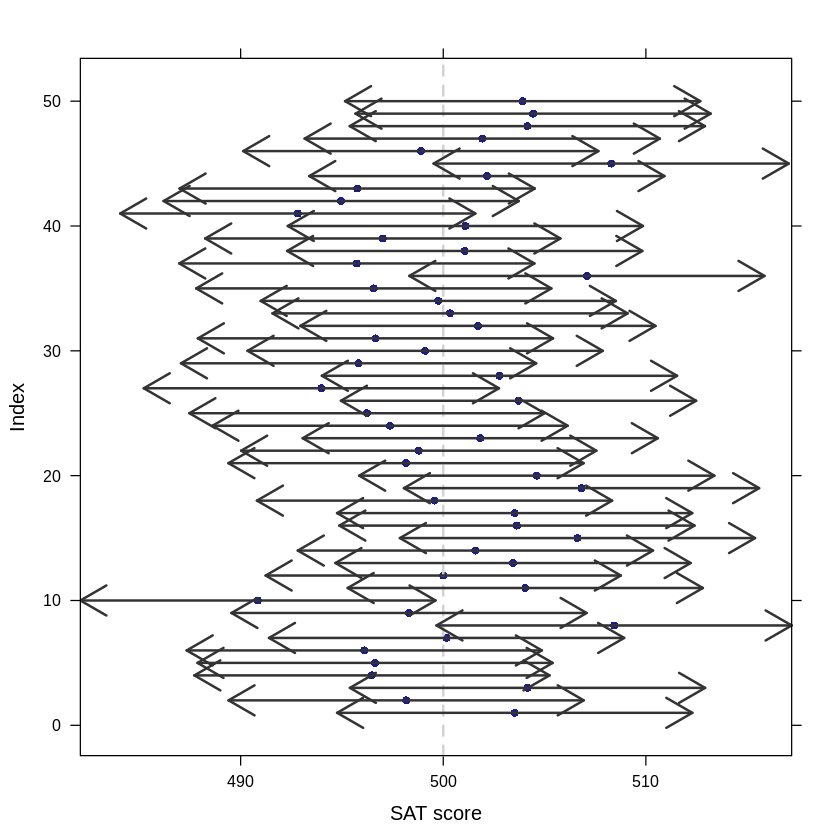

In [17]:
###plot confidence intervals -- sometimes the 
### simulation it doesn't cover the actual mean
xyplot(1:nrow(ci) ~ mean, data=ci, xlim=range(ci), xlab="SAT score", ylab="Index")
ladd(panel.abline(v=500, col="lightgray", lty=2))
ladd(with(ci, panel.arrows(x0 = lower, y0=1:nrow(ci), y1=1:nrow(ci), cex=0.5,
                             x1=upper, code=3)))


### The action of resampling with replacement is called boostrapping (We will come back to this method)

For example:

In [18]:
time = c(190.5, 109, 95.5, 137)
resample(time)

[1] 137 137 109 109

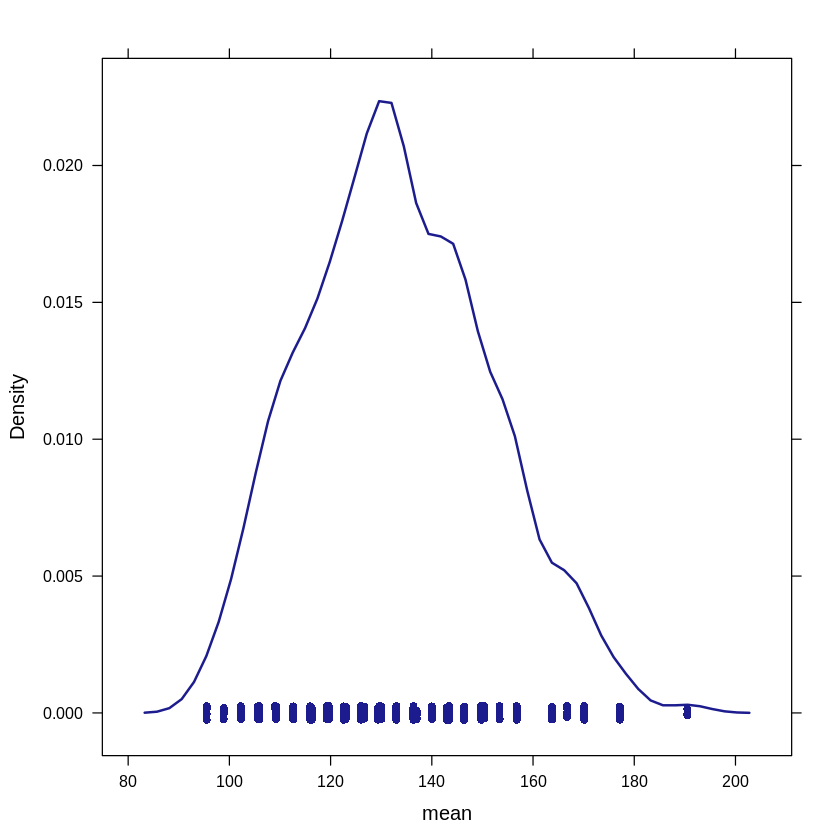

In [19]:
bootstrap = do(1000) * mean(resample(time))
densityplot(~mean, data=bootstrap)

## Hypothesis Testing

Once we have collected our data based on our initial hypothesis, is time to start exploring relationships across variables and they type of data that we have gathered.

We saw that point estimators allows us to have a general idea of the type of data and tha ranges where the data operates.

Next week, we will review multiple methods that allows us to detect possible error in the data and explore types of estimators that will help us with our analysis.

The central idea of hypothesis testing is to mathematically test whether our expectations are approximatelly close to the real population parameters. 

The classical approach is to generate intrinsic hypothesis which will allow to compartamentalize the decision regarding the validity of the approach.

### $H_o$ *null hypothesis* It is normally the default value - usually is the condition that is false

### $H_1$ *Alternative hypothese* It is normally the hypothesis we want to test (the one that is true)



##### We want to be able to determine with some percentage of confidence (normally it is 95) if we can reject the null hypothesis, in favor of the Alternative hypothesis.

In [20]:
###Is the coin biased?? Hypothesis testing
library(mosaic)
n_tosses = 1000

lower_bound = qbinom(0.025, n_tosses, 0.5)
upper_bound = qbinom(0.975, n_tosses, 0.5)


lower_bound
upper_bound



[1] 469

[1] 531

In [21]:
coin_flip = function(){
  ifelse(runif(1)>0.51,1,0) #if it's over 51% give 1, under give 0
}

coin_flip_biased = function(){
  rbinom(1,1,0.7)
}

In [22]:
observed_head_count = sum(do(n_tosses) * coin_flip())
#observed_head_count = sum(do(n_tosses) * coin_flip_biased())

if (observed_head_count >= lower_bound & observed_head_count <= upper_bound){
  print("Failed to reject the null!")
}else{
  print("Null rejected!")
}

[1] "Null rejected!"


### Formally, hypothesis testing can be expressed: if X is a random variable and R is the range of X. $R_{reject} \subset $ R is the rejection region. If $X \in R_{reject}$ then the null hypothesis.

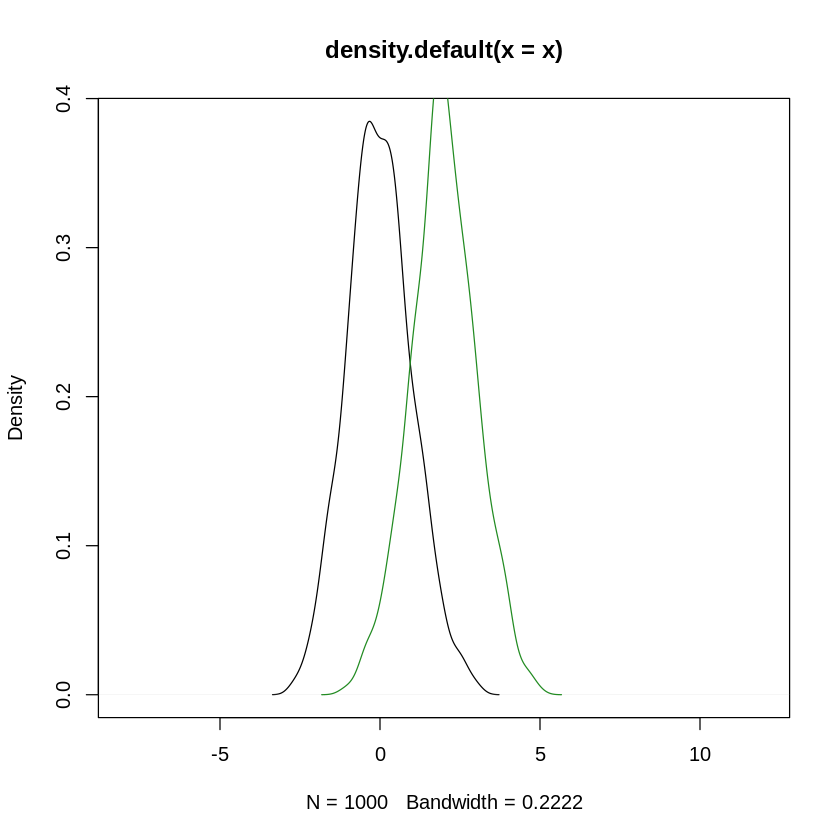

In [23]:
x = rnorm(1000,0,1)
y = rnorm(1000,2,1)

dx = density(x)
dy = density(y)

plot(dx, xlim = c(-8,12))
lines(dy, col = "forestgreen")

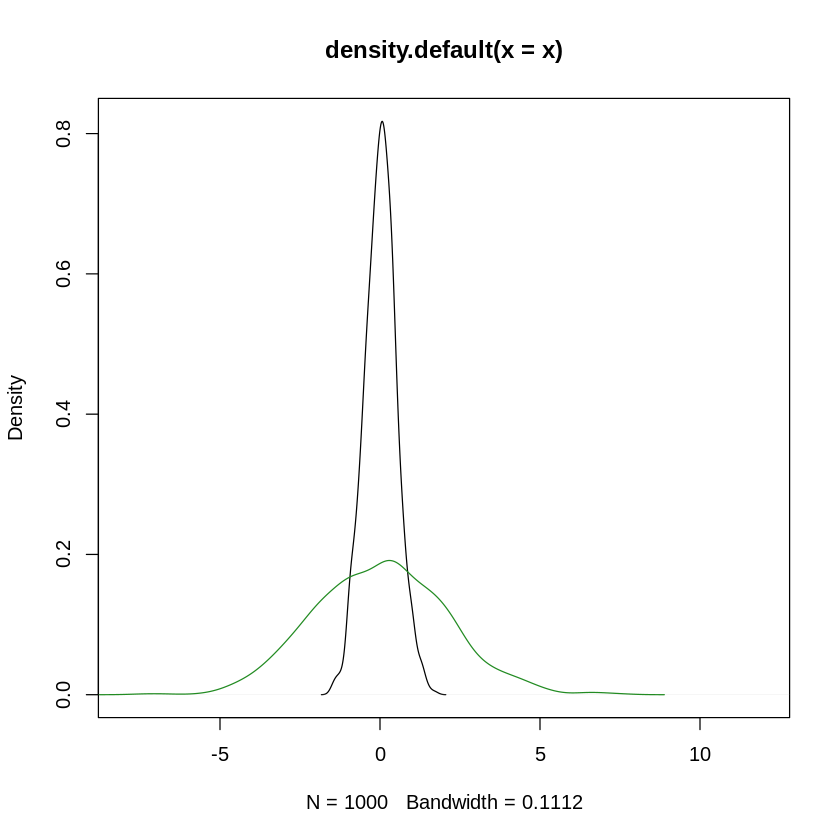

In [20]:
x = rnorm(1000,0,0.5)
y = rnorm(1000,0,2)

dx = density(x)
dy = density(y)

plot(dx, xlim = c(-8,12))
lines(dy, col = "forestgreen")